# Neuronal Network for Sentiment Analysis

Adapted from http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/machine_learning/scikit-learn/outofcore_modelpersistence.ipynb

<br>
<br>

## The IMDb Movie Review Dataset

In this section, we will train a simple logistic regression model to classify movie reviews from the 50k IMDb review dataset that has been collected by Maas et. al.

> AL Maas, RE Daly, PT Pham, D Huang, AY Ng, and C Potts. Learning word vectors for sentiment analysis. In Proceedings of the 49th Annual Meeting of the Association for Computational Lin- guistics: Human Language Technologies, pages 142–150, Portland, Oregon, USA, June 2011. Association for Computational Linguistics

[Source: http://ai.stanford.edu/~amaas/data/sentiment/]

The dataset consists of 50,000 movie reviews from the original "train" and "test" subdirectories. The class labels are binary (1=positive and 0=negative) and contain 25,000 positive and 25,000 negative movie reviews, respectively.
For simplicity, I assembled the reviews in a single CSV file.


In [1]:
import pandas as pd
# if you want to download the original file:
#df = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/50k_imdb_movie_reviews.csv')
# otherwise load local file
df = pd.read_csv('shuffled_movie_data.csv')
df.tail()

,review,sentiment
49995,"OK, lets start with the best. the building. al...",0
49996,The British 'heritage film' industry is out of...,0
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0
49999,I waited long to watch this movie. Also becaus...,1


Let us shuffle the class labels.

In [2]:
import numpy as np
## uncomment these lines if you have dowloaded the original file:
#np.random.seed(0)
#df = df.reindex(np.random.permutation(df.index))
#df[['review', 'sentiment']].to_csv('shuffled_movie_data.csv', index=False)

<br>
<br>

## Preprocessing Text Data

Now, let us define a simple `tokenizer` that splits the text into individual word tokens. Furthermore, we will use some simple regular expression to remove HTML markup and all non-letter characters but "emoticons," convert the text to lower case, remove stopwords, and apply the Porter stemming algorithm to convert the words into their root form.

In [3]:
import numpy as np
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')
porter = PorterStemmer()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) #+ ' '.join(emoticons).replace('-', '')
    text = [w for w in text.split() if w not in stop]
    tokenized = [porter.stem(w) for w in text]
    return text

Let's give it at try:

In [4]:
#
print(tokenizer('This :) is a <a> test!"hoa" :-)</br>'))

#tamaño de la palabra
print(len(tokenizer('This :) is a <a> test!"hoa" :-)</br>')))

#convertir tokesn a lista de lista

def toList(text):
    review = []
    for w in text:
        review.append([w])
    return review
    
print(toList(tokenizer('This :) is a <a> test!"hoa" :-)</br>')))


['test', 'hoa']
2
[['test'], ['hoa']]


## Learning (SciKit)

First, we define a generator that returns the document body and the corresponding class label:

In [5]:
def stream_docs(path):
    with open(path, 'r') as csv:
        next(csv) # skip header
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label

To conform that the `stream_docs` function fetches the documents as intended, let us execute the following code snippet before we implement the `get_minibatch` function:

In [6]:
next(stream_docs(path='shuffled_movie_data.csv'))

('"In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />""Murder in Greenwich"" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich f

After we confirmed that our `stream_docs` functions works, we will now implement a `get_minibatch` function to fetch a specified number (`size`) of documents:

In [7]:
def get_minibatch(doc_stream, size):
    docs, y = [], []
    for _ in range(size):
        text, label = next(doc_stream)
        
        docs.append(toList(tokenizer(text)))
        y.append(label)
    return docs, y

In [8]:
# primero vamos cargar todos los datos en un X y Y para extraer las caracteristias 

X,Y = get_minibatch(stream_docs(path='shuffled_movie_data.csv'), size= 50000) # get string of text

#print(ar[0][0])

## Extraccion de feature  de word2vect con gensim desde Cero

en es paso vamos usar la libreria Gensim para generar nuestro proppio diccionarion de un Word2vect embedding
de tal forma que tambien podemos definir el tamaño de los vectores por palabra, para este ejemplo y por motivos de prueba solo consideramos 20 el tamaño de cada vector,sin embargo se recommienda de 100-300 para el optimo desempeño, lo que se hace aqui es:
- generar nuestro modelo word2vect = n
- almacenamos las palabras con fuerte relacion de vencidad en un diccionario = w2v
- consideramos el promedio de los vectores para su mejor representacion de los features
- finalmente se almacena  en un X_total (total de features 'matriz'50000 x 20)

In [9]:
# tamaño se texto X, Y

print('size of X:',len(X))
print('size of X[4]: ',len(X[4]))
#print('dato :',X[0])

#definir el numero de  el word embedding para cada review
import gensim

    
#word to vect para un review 

#recorrer para los 50 de X
#X_train = []

    
#print(X[0])    

X_total = []

for i in range(len(X)):
    n = gensim.models.Word2Vec(X[i], size= 20,min_count=1)
    w2v = dict(zip(n.wv.index2word, n.wv.syn0))
    letra = list(n.wv.vocab)
    da = []
    for i in range(len(w2v)):
        da.append(w2v[letra[i]])
    X_total.append(np.mean(da, axis = 0))



size of X: 50000
size of X[4]:  62


/home/ewilderd/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


Next, we will make use of the "hashing trick" through scikit-learns [HashingVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html) to create a bag-of-words model of our documents. Details of the bag-of-words model for document classification can be found at  [Naive Bayes and Text Classification I - Introduction and Theory](http://arxiv.org/abs/1410.5329).

In [12]:
from sklearn.feature_extraction.text import HashingVectorizer
vect = HashingVectorizer(decode_error='ignore', 
                         n_features=2**21,
                         preprocessor=None, 
                         tokenizer=tokenizer)

# Exercise 1: define features based on word embeddings (pre-trained word2vec / Glove/Fastext emebddings can be used)
# Define suitable d dimension, and sequence length

#Definiremos el dato para el test
X_train,X_test=X_total[:45000], X_total[45000:]
X_test = np.asarray(X_test)
X_train = np.asarray(X_train)

X_train.shape, X_test.shape

((45000, 20), (5000, 20))

### Adaptando mis datos para my own NN 3layers

en esta parte adaptamos los datos para que se puedan operar de la forma que implemente la red neuronal de 3
capas , aqui se puede ver:
- x_train, X_test, Y_train, Y_test que son el dato para el training y el test, respectivamente con 45 mil y 5 mil para el test.
- tambien debemos decir que X_total , Y_total son la cantidad de features y labels totales 50 mil filas cada uno

In [15]:
'''
import gensim
# sea X la lista de textos token (es decir lista de lista de tokens)
modelo = gensim.models.Word2Vec(X, size=20, workers= 4)
w2v = dict(zip(modelo.wv.index2word, modelo.wv.syn0))
# reducir el modelo en vocabulario de tamaño en el modelo
words = list(modelo.wv.vocab)
#guardaremos el modleo
modelo.save('model.bin')
#abrir el modelo y cargar
new_model = gensim.models.Word2Vec.load('model.bin')

print('words: ',len(words))
'''

X = np.asarray(X_train)
#Y = np.asarray(Y)
#Y_train = np.zeros((5000,2))
y_1 = []
y_2 = []
#validar Y_train
for k in range(len(Y)):
    if Y[k] == 1:
        y_1.append(Y[k])  
        y_2.append(0)
    else:
        y_1.append(0)  
        y_2.append(Y[k])
Y_total = np.column_stack((np.array(y_1),np.array(y_2)))
print('penultimo: ',Y_total[0][0])

#dividir y
Y_train = np.asarray(Y_total[:45000])
Y_test = np.asarray(Y_total[45000:])
        
Y_train.shape , Y_test.shape

penultimo:  1


((45000, 2), (5000, 2))

### My own NN 3layes

en esta parte se implemente mi propia red neuronal, con tres capas , debemos decir que esta comentado en cada paso para su mejor comprension, y puede ser mejorada por ud, usamos :

- fordward propagation: la progacion directa y hallar para los primero z = x*w + b , 1,2,3
- backward propagation: se implementó la propagación backward con al gradiente descendiente derivando los errores de costo para ajustar los pesos por convergencia.
- tambien se utilizo, solo con fines de aprendizaje la funcion de activacion tanh, ud, puede optar por sigmoide.
- y finalmente esto tambien puede adaptarse a mas de 2 salidas pues usa softmax en la ultima capa.
- adicionalmente se hace un test del training y su acuraccy y se ploteo tmb para ver el desarrollo por iteraciones.

Loss despues de iter:  0 : 0.348393709003807
training Accuracy despues de iter:  0 : 0.1711111111111111 %
Loss despues de iter:  100 : 0.14338126206093127
training Accuracy despues de iter:  100 : 100.0 %
Loss despues de iter:  200 : 0.1438039606961593
training Accuracy despues de iter:  200 : 100.0 %


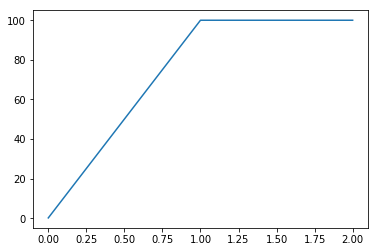

In [36]:
# Package imports
# Matplotlib is a matlab like plotting library
import matplotlib
import matplotlib.pyplot as plt
# SciKitLearn is a useful machine learning utilities library
import sklearn
# The sklearn dataset module helps generating datasets
import sklearn.datasets
import sklearn.linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score# Aqui vamos a definir todas nuestra funciones 
# de la Red Neuronal de 3 capas

# funcion softmax
def softmax(z):
    #Calculamos el exponente
    # e^z
    exp_scores = np.exp(z)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def softmax_loss(y,y_hat):
    # haciendo Clipping a los valores
    minval = 0.000000000001
    # Numero de muestras 
    m = y.shape[0]
    # formula Loss , con np.sum suma la matriz completa y ademas hace el trabajo
    # de dos sumas para la formula
    loss = -1/m * np.sum(y * np.log(y_hat.clip(min=minval)))
    return loss

def loss_derivative(y,y_hat):
    return (y_hat-y)

def tanh_derivative(x):
    return (1 - np.power(x, 2))

#PROPAGACION FORWARD
# Este es la funcion de progracacion Directa
def forward_prop(model,a0):

    # Cargamos los parametro del modelo
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'],model['b3']
    
    # hacemos el primer paso lineal
    # Z1 es la capa input: x veces el producto punto con weights +  (bias) b
    z1 = a0.dot(W1) + b1
    
    # Pasamos luego la funcion de activacion
    a1 = np.tanh(z1)
    
    # Segundo paso lineal
    z2 = a1.dot(W2) + b2
    
    # Segunda funcion de activacion
    a2 = np.tanh(z2)
    
    #Tercer paso lineal
    z3 = a2.dot(W3) + b3
    
    #Aqui, en la tercera funcion de activacion usamos softmax,puede usarse
    #tambien el sigmoide softmax para la ultima capa
    a3 = softmax(z3)
    
    #Guardamos todos los resultados en cache
    cache = {'a0':a0,'z1':z1,'a1':a1,'z2':z2,'a2':a2,'a3':a3,'z3':z3}
    return cache

# Esto es la funcion backward propagation
def backward_prop(model,cache,y):

    # Cargamos los parametros del modelo
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'],model['W3'],model['b3']
    
    # Cargamos los resultados de forward propagation
    a0,a1, a2,a3 = cache['a0'],cache['a1'],cache['a2'],cache['a3']
    
    # Sacamos el numero de muestras
    m = y.shape[0]
    
    # Calculamos la derivada 'loss' con respeto a la salida
    dz3 = loss_derivative(y=y,y_hat=a3)

    # Calculamos la derivada loss con respecto a la 2da capa y pesos
    dW3 = 1/m*(a2.T).dot(dz3) #dW2 = 1/m*(a1.T).dot(dz2) 
    
    # Calcular la derivada loss del bias
    db3 = 1/m*np.sum(dz3, axis=0)
    
    # Calcular la derivada loss de la 1ra capa
    dz2 = np.multiply(dz3.dot(W3.T) ,tanh_derivative(a2))
    
    # Calcular la derivada loss del 1er peso
    dW2 = 1/m*np.dot(a1.T, dz2)
    
    # Calcular la derivada loss dela primera capa bias
    db2 = 1/m*np.sum(dz2, axis=0)
    
    dz1 = np.multiply(dz2.dot(W2.T),tanh_derivative(a1))
    
    dW1 = 1/m*np.dot(a0.T,dz1)
    
    db1 = 1/m*np.sum(dz1,axis=0)
    
    # Guardar los gradientes
    grads = {'dW3':dW3, 'db3':db3, 'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

#FASE DE ENTRENAMIENTO
def initialize_parameters(nn_input_dim,nn_hdim,nn_output_dim):
    # Primera capa con pesos
    # creamos matriz de:13 ,5) random -1 values
    W1 = 2 *np.random.randn(nn_input_dim, nn_hdim) - 1
    
    # 1ra capa bias : 1 row y nn_hdim colums
    b1 = np.zeros((1, nn_hdim))
    
    # Segunda capa W
    W2 = 2 * np.random.randn(nn_hdim, nn_hdim) - 1
    
    # Segunda capa bias
    b2 = np.zeros((1, nn_hdim))
    W3 = 2 * np.random.rand(nn_hdim, nn_output_dim) - 1
    b3 = np.zeros((1,nn_output_dim))
    
    
    # Package y return modelo
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2,'W3':W3,'b3':b3 }
    return model

def update_parameters(model,grads,learning_rate):
    # Cargar parametros
    W1, b1, W2, b2,b3,W3 = model['W1'], model['b1'], model['W2'], model['b2'],model['b3'],model["W3"]
    
    # Actualizar parametros
    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']
    W3 -= learning_rate * grads['dW3']
    b3 -= learning_rate * grads['db3']
    
    # Guardas y return parametros
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3':W3,'b3':b3}
    return model

def predict(model, x):
    # hacer el paso forward
    c = forward_prop(model,x)
    # Obtener y_hat
    y_hat = np.argmax(c['a3'], axis=1)
    return y_hat

def calc_accuracy(model,x,y):
    # Obtener el numero total de muestras
    m = y.shape[0]
    # Hacer la prediccion para el modelo
    pred = predict(model,x)
    # Asegurar la prediccion y el vector real y tener la forma
    pred = pred.reshape(y.shape)
    # Calcular el numero de muestras malas
    error = np.sum(np.abs(pred-y))
    # Calcular el accuracy
    return (m - error)/m * 100
losses = []

def train(model,X_,y_,learning_rate, epochs=20000, print_loss=False):
    # Gradiente descendiente. bluce de epocas
    for i in range(0, epochs):

        # Forward propagation
        cache = forward_prop(model,X_)
        #a1, probs = cache['a1'],cache['a2']
        # Backpropagation
        
        grads = backward_prop(model,cache,y_)
        # Gradiente descendiente y actualar parametros
        # Asignar nuevo parametros al modelo
        model = update_parameters(model=model,grads=grads,learning_rate=learning_rate)
    
        # Imprimir loss & accuracy cada 100 iteraciones
        if print_loss and i % 100 == 0:
            a3 = cache['a3']
            print('Loss despues de iter: ',i,':',softmax_loss(y_,a3))
            y_hat = predict(model,X_)
            y_true = y_.argmax(axis=1)
            print('training Accuracy despues de iter: ',i,':',accuracy_score(y_pred=y_hat,y_true=y_true)*100,'%')
            losses.append(accuracy_score(y_pred=y_hat,y_true=y_true)*100)
    return model

#inicializamos la semilla random
np.random.seed(0)
# main 
model = initialize_parameters(nn_input_dim=20, nn_hdim= 5, nn_output_dim= 2)
model = train(model,X_train,Y_train,learning_rate=0.07,epochs=300,print_loss=True)
plt.plot(losses)





### Test my ow NN

en esta parte se hace el test de la red neuronal de 3 capas y se pude ver el acuracy tambien , debemos decir que no se considero directamente, se recomienda usar cross validation.

In [37]:
print('MY OWN IMPLEMENTATION TEST ACCURACY: ')
y_h = predict(model,np.asarray(X_test))
print( y_h)
print(accuracy_score(y_pred=y_h,y_true=Y[45000:])*100,'%')

MY OWN IMPLEMENTATION TEST ACCURACY: 
[0 0 0 ... 0 0 0]
49.36 %


### Con la red neuronal MLPClassifier  (skLearn)

una ves implementado nuestro propia red neuronal ahora vamos probar con la red neuronal del sklearn
con la cual tambien haremos el entrenamiento y el test.
asi que hechemos las ganas y a probar.

In [35]:
from sklearn.neural_network import MLPClassifier
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,20), random_state=1)
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', random_state=1, max_iter=300)
classes = np.array([0, 1])
clf.partial_fit(X_train, Y[:45000], classes=classes)
y_h2 = clf.predict(X_test)


print('SKLEARN NN accuracy of Test: ',accuracy_score(y_pred=y_h2,y_true=Y[45000:])*100,'%')


SKLEARN NN accuracy of Test:  49.36 %


Using the [SGDClassifier]() from scikit-learn, we will can instanciate a logistic regression classifier that learns from the documents incrementally using stochastic gradient descent. 

In [9]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', random_state=1, max_iter=1)
doc_stream = stream_docs(path='shuffled_movie_data.csv')

# Exercise 2: Define at least a Three layer neural network. Define its structure (number of hidden neurons, etc)
# Define a nonlinear function for hidden layers.
# Define a suitable loss function for binary classification
# Implement the backpropagation algorithm for this structure
# Do not use Keras / Tensorflow /PyTorch etc. libraries
# Train the model using SGD

In [10]:
#import pyprind
#pbar = pyprind.ProgBar(45)

classes = np.array([0, 1])
for _ in range(45):
    X_train, y_train = get_minibatch(doc_stream, size=1000)
    X_train = vect.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)
    #pbar.update()

Depending on your machine, it will take about 2-3 minutes to stream the documents and learn the weights for the logistic regression model to classify "new" movie reviews. Executing the preceding code, we used the first 45,000 movie reviews to train the classifier, which means that we have 5,000 reviews left for testing:

In [13]:
X_test, y_test = get_minibatch(doc_stream, size=5000)
X_test = vect.transform(X_test)
print('Accuracy: %.3f' % clf.score(X_test, y_test))
#Exercise 3: compare  with your Neural Network

Accuracy: 0.867


I think that the predictive performance, an accuracy of ~87%, is quite "reasonable" given that we "only" used the default parameters and didn't do any hyperparameter optimization. 

After we estimated the model perfomance, let us use those last 5,000 test samples to update our model.

In [18]:
clf = clf.partial_fit(X_test, y_test)

<br>
<br>

# Model Persistence

In the previous section, we successfully trained a model to predict the sentiment of a movie review. Unfortunately, if we'd close this IPython notebook at this point, we'd have to go through the whole learning process again and again if we'd want to make a prediction on "new data."

So, to reuse this model, we could use the [`pickle`](https://docs.python.org/3.5/library/pickle.html) module to "serialize a Python object structure". Or even better, we could use the [`joblib`](https://pypi.python.org/pypi/joblib) library, which handles large NumPy arrays more efficiently.

To install:
conda install -c anaconda joblib

In [21]:
import joblib
import os
if not os.path.exists('./pkl_objects'):
    os.mkdir('./pkl_objects')
    
joblib.dump(vect, './vectorizer.pkl')
joblib.dump(clf, './clf.pkl')

['./clf.pkl']

Using the code above, we "pickled" the `HashingVectorizer` and the `SGDClassifier` so that we can re-use those objects later. However, `pickle` and `joblib` have a known issue with `pickling` objects or functions from a `__main__` block and we'd get an `AttributeError: Can't get attribute [x] on <module '__main__'>` if we'd unpickle it later. Thus, to pickle the `tokenizer` function, we can write it to a file and import it to get the `namespace` "right".

In [22]:
%%writefile tokenizer.py
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')
porter = PorterStemmer()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    text = [w for w in text.split() if w not in stop]
    tokenized = [porter.stem(w) for w in text]
    return text

Writing tokenizer.py


In [23]:
from tokenizer import tokenizer
joblib.dump(tokenizer, './tokenizer.pkl')

['./tokenizer.pkl']

Now, let us restart this IPython notebook and check if the we can load our serialized objects:

In [24]:
import joblib
tokenizer = joblib.load('./tokenizer.pkl')
vect = joblib.load('./vectorizer.pkl')
clf = joblib.load('./clf.pkl')

After loading the `tokenizer`, `HashingVectorizer`, and the tranined logistic regression model, we can use it to make predictions on new data, which can be useful, for example, if we'd want to embed our classifier into a web application -- a topic for another IPython notebook.

In [25]:
example = ['I did not like this movie']
X = vect.transform(example)
clf.predict(X)

array([0])

In [26]:
example = ['I loved this movie']
X = vect.transform(example)
clf.predict(X)

array([1])